# Multi-class Classification

## 1. Import and become one with the data

In [1]:
import zipfile

# Download zip file of 10_food_classes images
# See how this data was created - https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()


--2023-11-30 23:11:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.221.155, 142.251.221.123, 142.251.223.27, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.221.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  3.16MB/s    in 2m 49s  

2023-11-30 23:14:39 (2.92 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [4]:
import os 

for dirpath, dirnames, filenames in os.walk("/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data"):
    print(f"there are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

there are 2 directories and 0 images in '/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data'.
there are 10 directories and 0 images in '/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data/train'.
there are 0 directories and 750 images in '/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data/train/grilled_salmon'.
there are 0 directories and 750 images in '/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data/train/sushi'.
there are 0 directories and 750 images in '/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data/train/hamburger'.
there are 0 directories and 750 images in '/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data/train/steak'.
there are 0 directories and 750 images in '/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data/train/fried_rice'.
there are 0 directories and 750 images in '/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data/train/chicken_curry'.
there are 0 directories and 750 ima

In [5]:
train_dir = "/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data/train/"
test_dir = "/home/gabe/Documents/TF_Learn_DL/data/10_food_classes_all_data/test/"

In [6]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [7]:
# Function to visualize images in a grid format
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = target_dir+target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder),1)
    
    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print(f"Image shape: {img.shape}") # show the shape of the image
    
    return img

Image shape: (512, 415, 3)


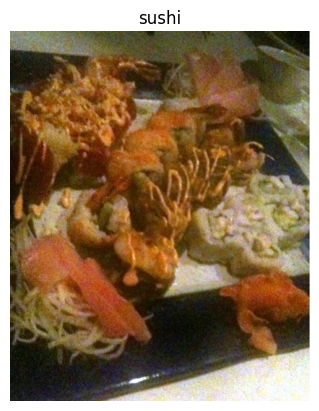

In [8]:
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

## 2. Preprocess the data (prepare it for a model)

In [9]:
from keras.preprocessing.image import ImageDataGenerator

# Rescale the data
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(
    directory=train_dir, # target directory
    target_size=(224,224), # target image size
    batch_size=32, # batch size (32 is default)
    class_mode="categorical", # type of problem we're working on
)

# Create test data generator and load in test data
test_data = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model (start with a baseline)

In [10]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

# Create a CNN model (same as Tiny VGG)
model = Sequential(
    [
        Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3)),
        Conv2D(10,3,activation="relu"),
        MaxPool2D(pool_size=2),
        Conv2D(10,3,activation="relu"),
        Conv2D(10,3,activation="relu"),
        MaxPool2D(pool_size=2),
        Flatten(),
        Dense(10,activation="softmax")
    ]     
)

model.compile(
    loss="categorical_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)


2023-11-30 23:18:03.108066: I tensorflow/stream_executor/rocm/rocm_gpu_executor.cc:832] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-30 23:18:04.058967: I tensorflow/stream_executor/rocm/rocm_gpu_executor.cc:832] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-30 23:18:04.059023: I tensorflow/stream_executor/rocm/rocm_gpu_executor.cc:832] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-30 23:18:04.059811: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the app

## 4. Fit a model

In [11]:
summary = model.fit(
    train_data,
    epochs=5,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data)
)

Epoch 1/5


2023-11-30 23:18:09.028580: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:18:09.038591: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:18:09.452582: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:18:09.458962: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:18:09.461041: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:18:09.462645: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 2.1296 - accuracy: 0.2260

2023-11-30 23:19:05.158456: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:19:05.167194: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:19:05.263612: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:19:05.267415: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:19:05.269327: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:19:05.270662: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 61s 255ms/step - loss: 2.1296 - accuracy: 0.2260 - val_loss: 1.9596 - val_accuracy: 0.3080
Epoch 2/5


2023-11-30 23:19:09.754991: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:19:09.761260: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:19:09.763666: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:19:09.765619: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 1.8400 - accuracy: 0.3711

2023-11-30 23:20:05.104116: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:20:05.112957: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:20:05.117780: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:20:05.120221: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:20:05.122194: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 60s 254ms/step - loss: 1.8400 - accuracy: 0.3711 - val_loss: 1.9173 - val_accuracy: 0.3252
Epoch 3/5


2023-11-30 23:20:09.513814: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:20:09.520685: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:20:09.522880: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:20:09.524299: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 1.4955 - accuracy: 0.5013

2023-11-30 23:21:04.787598: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:21:04.796121: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:21:04.800759: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:21:04.802988: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:21:04.804674: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 60s 254ms/step - loss: 1.4955 - accuracy: 0.5013 - val_loss: 2.0192 - val_accuracy: 0.3276
Epoch 4/5


2023-11-30 23:21:09.186329: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:21:09.193324: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:21:09.195283: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:21:09.196736: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 0.9582 - accuracy: 0.6877

2023-11-30 23:22:04.173964: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:22:04.182740: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:22:04.187142: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:22:04.189574: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:22:04.191179: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 59s 252ms/step - loss: 0.9582 - accuracy: 0.6877 - val_loss: 2.5303 - val_accuracy: 0.2952
Epoch 5/5


2023-11-30 23:22:08.559021: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:22:08.566506: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:22:08.568554: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:22:08.569937: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - ETA: 0s - loss: 0.4447 - accuracy: 0.8597

2023-11-30 23:23:03.624936: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:23:03.633755: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:23:03.638680: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:23:03.641687: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.
2023-11-30 23:23:03.643701: I tensorflow/core/common_runtime/gpu_fusion_pass.cc:507] ROCm Fusion is enabled.


235/235 [==============================] - 60s 253ms/step - loss: 0.4447 - accuracy: 0.8597 - val_loss: 3.7768 - val_accuracy: 0.2632
